In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
#file path
file='gaussian.csv'

In [146]:
#data import
xdata=np.genfromtxt(file,usecols=(0),delimiter=',')
tdata=np.genfromtxt(file,usecols=(1),delimiter=',')

In [147]:
#xdata=xdata[:20]
#tdata=tdata[:20]

In [206]:
#vector of size m making phi(x)
def make_phi(m,x_i):
    phi=np.zeros(m)
    for i in range(m):
        phi[i]=x_i**i
    return phi

In [208]:
#returns (t-y)^2 for one input point(single n value)
def square_error(m,t_i,w,x_i):
    phi=make_phi(m,x_i)
    w_t=w[:,None].transpose()
    wphi=np.matmul(w_t,phi[:,None])
    y=np.sum(wphi)
    diff=t_i-y
    #return abs(diff)
    return diff**2

In [209]:
#SSE for n data points
def sum_square_error(m,n,t,w,x):
    total=0
    for i in range(n):
        total+=square_error(m,t[i],w,x[i])
    return total/2

In [210]:
#RMS error given SSE for n points
def rms_error(sse,n):
    return (sse*2/n)**0.5

In [211]:
#single data point gradient of error
def der_k_m(m,w,t_k,x_k):
    phi=make_phi(m,x_k)
    wphi=np.matmul(w.transpose(),phi)
    f=np.sum(wphi)
    diff=t_k-f
    phi=diff*phi
    return phi
    

In [212]:
#single data point gradient of error regularized
def der_k_m_reg(lamb,m,w,t_k,x_k):
    phi=make_phi(m,x_k)
    wphi=np.matmul(w.transpose(),phi)
    f=np.sum(wphi)
    diff=t_k-f
    phi=diff*phi
    phi=np.add(phi,2*lamb*w)
    return phi
    

In [213]:
#gradient of error summed over entire batch size
def der_err(n,m,t,x,w,lamb=-1):
    dE=np.zeros(m)
    for k in range(n):
        if lamb!=-1:
            ele_k=der_k_m_reg(lamb,m,w,t[k],x[k])
        else:
            ele_k=der_k_m(m,w,t[k],x[k])
        dE=np.add(dE,ele_k)
    return dE

In [214]:
#regularized sse
def reg_sum_square_error(lamb,m,n,t,w,x):
    sse=sum_square_error(m,n,t,w,x)
    w_t=w[:,None].transpose()
    rege=np.sum((lamb/2)*np.matmul(w_t,w[:,None]))
    #print(reg,sse)#source of low lambda invariance
    return rege+sse

In [215]:
#gradient descent 
def gd(n,m,xdata,tdata,learning_rate,iter_bound):
    w=np.zeros(m)
    x=xdata[:n]
    t=tdata[:n]
    err_bound_up=sum_square_error(m,n,t,w,x)
    #print('ebu',err_bound_up)
    for i in range(iter_bound):
        w2=np.add(w,learning_rate*der_err(n,m,t,x,w))
        a=(sum_square_error(m,n,t,w2,x))
        #print(a)
        if(a>2*err_bound_up):
            learning_rate/=10
            print('lr',learning_rate)
            continue
        w=w2
    return a,learning_rate,w

In [216]:
#large m values leading to error function going to inf... so keeping m less than 8

0
1628.589585665
--- 3.1223301887512207 seconds ---
1
lr 0.1
1628.5895856649993
--- 3.1814229488372803 seconds ---
2
lr 0.1
lr 0.01
1204.9151287164905
--- 3.4022178649902344 seconds ---
3
lr 0.1
lr 0.01
689.9685293841127
--- 3.5256378650665283 seconds ---
4
lr 0.1
lr 0.01
lr 0.001
276.10266911238557
--- 3.599867105484009 seconds ---
5
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
105.24452908831597
--- 3.7573671340942383 seconds ---
6
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
65.90950978647433
--- 3.8201892375946045 seconds ---
7
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
78.11809616865884
--- 3.991305112838745 seconds ---
8
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
lr 1.0000000000000002e-06
277.26860036182603
--- 4.149724006652832 seconds ---
9
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
lr 1.0000000000000002e-06
lr 1.0000000000000002e-07
421.5943358778513
--- 4.19188380241394 seconds ---
10
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
lr 1.0000000000000002e-06
lr 1.0000000000000002e-07
444.83869825118904


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


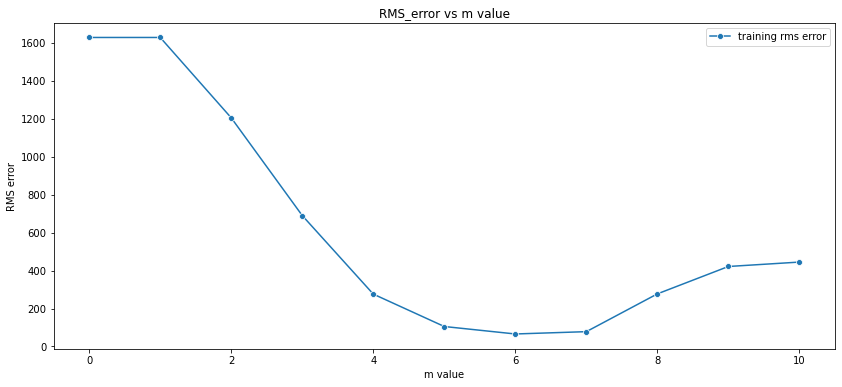

In [217]:
#looping over m values to check a tempporary good fitting m that is practical as well(doesnt exceeds computation power)
#takes lot of time 90 s per m value for 50k iterations
#7 is good value
#error vs m value
err=[]
x=[i for i in range(11)]
for i in range(11):
    print(i)
    start_time = time.time()
    a,lr,w=gd(20,i,xdata,tdata,1,10000)
    err.append(a)
    print(a)
    print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(14,6))
sns.lineplot(x,err,marker='o',label='training rms error')
plt.title('RMS_error vs m value')
plt.xlabel("m value")
plt.ylabel("RMS error")
plt.show()

0
lr 0.1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
3214.781371296783
--- 19.09783387184143 seconds ---
1
lr 0.01
lr 0.001
lr 0.0001
lr 1e-05
3214.780540999847
--- 19.088099241256714 seconds ---
2
lr 0.001
lr 0.0001
lr 1e-05
3214.7797108521595
--- 19.19448208808899 seconds ---
3
lr 0.0001
lr 1e-05
3214.7788808536584
--- 19.479131937026978 seconds ---
4
lr 1e-05
3214.778051004277
--- 19.34282612800598 seconds ---
5
3214.777221303952
--- 19.317536115646362 seconds ---
6
3510.6864146891985
--- 19.073235988616943 seconds ---
7
5099.8077775619695
--- 19.13254976272583 seconds ---
8
6527.62341546998
--- 19.14657998085022 seconds ---
9
7139.178562115069
--- 19.197262048721313 seconds ---
10
8936.189765690793
--- 19.191015005111694 seconds ---


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


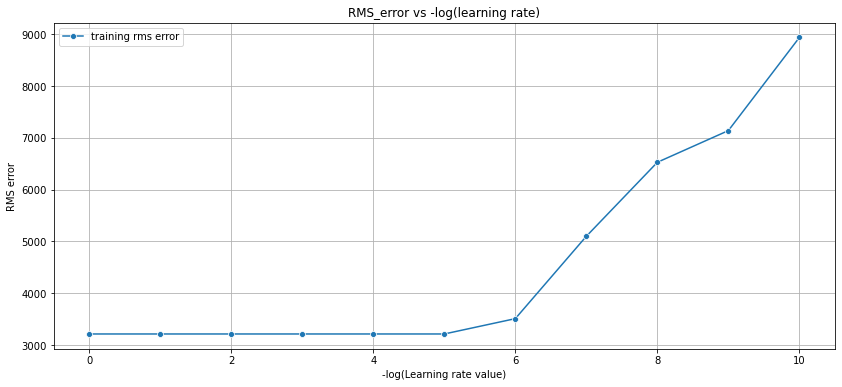

In [218]:
#adjusting learning rate for m=6
#error vs learning rate
err=[]
x=[i for i in range(11)]
for i in range(11):
    start_time = time.time()
    print(i)
    a,lr,w=gd(100,6,xdata,tdata,1/(10**i),10000)
    print(a)
    err.append(a)
    print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(14,6))
sns.lineplot(x,err,marker='o',label='training rms error')
plt.title('RMS_error vs -log(learning rate)')
plt.xlabel("-log(Learning rate value)")
plt.ylabel("RMS error")
plt.grid(True)
plt.show()

In [219]:
#finalising coeff of eta
start_time = time.time()
a,lr,w=gd(100,6,xdata,tdata,2.1e-5,5000)
print(a)

3214.3794413907017


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


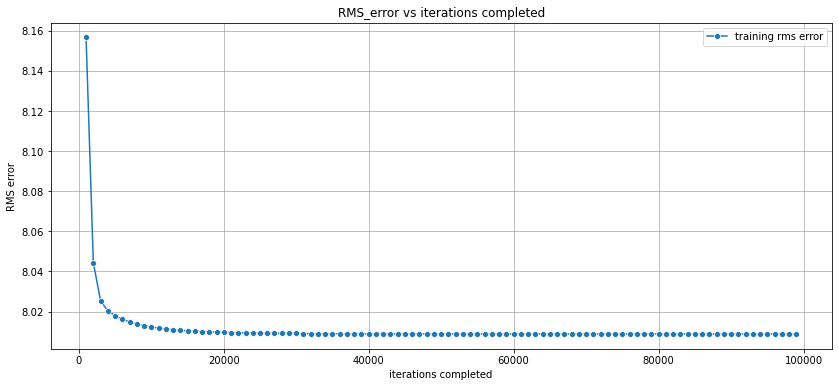

--- 191.8687949180603 seconds ---


In [220]:
#plotting error vs iterations
#highly time taking
m=6
n=100
learning_rate=2.1e-5
iter_bound=100000#0
start_time = time.time()
w=np.zeros(m)
x=xdata[:n]
t=tdata[:n]
err=[]
iteration=[]
err_bound_up=sum_square_error(m,n,t,w,x)
for i in range(iter_bound):
    w2=np.add(w,learning_rate*der_err(n,m,t,x,w))
    a=(sum_square_error(m,n,t,w2,x))
    if(a>2*err_bound_up):
        learning_rate/=10
        continue
    if(i%1000==0 and i!=0):
        err.append(rms_error(a,n))
        #print(i,rms_error(a,n))
        iteration.append(i)
    w=w2
plt.figure(figsize=(14,6))
sns.lineplot(iteration,err,marker='o',label='training rms error')
plt.title('RMS_error vs iterations completed')
plt.xlabel("iterations completed")
plt.ylabel("RMS error")
plt.grid(True)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

In [222]:
#batch gradient descent
def gd_batch(n,m,x_full,t_full,batch_size=-1,learning_rate=1,epochs=10000):
    w=np.zeros(m)
    err_bound_up=sum_square_error(m,n,t_full,w,x_full)
    if(batch_size==-1):
        batch_size=n
    batch_size=int(batch_size)
    batch_count=int(np.ceil(n/batch_size))
    epochs=int(epochs/batch_count)#modified epochs to control iterations
    for e in range(epochs):
        for b in range(batch_count):
            start_index=b*batch_size
            end_index=min(start_index+batch_size,n)
            x=x_full[start_index:end_index]
            t=t_full[start_index:end_index]
            
            w2=np.add(w,learning_rate*der_err(end_index-start_index,m,t,x,w))
            a=(sum_square_error(m,n,t_full,w2,x_full))
            
            while(a>2*err_bound_up):
                learning_rate/=10
                w2=np.add(w,learning_rate*der_err(end_index-start_index,m,t,x,w))
                a=(sum_square_error(m,n,t_full,w2,x_full))
            
            w=w2
    return a,learning_rate,w

min error at batch size 100 error 8.012364533915399


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


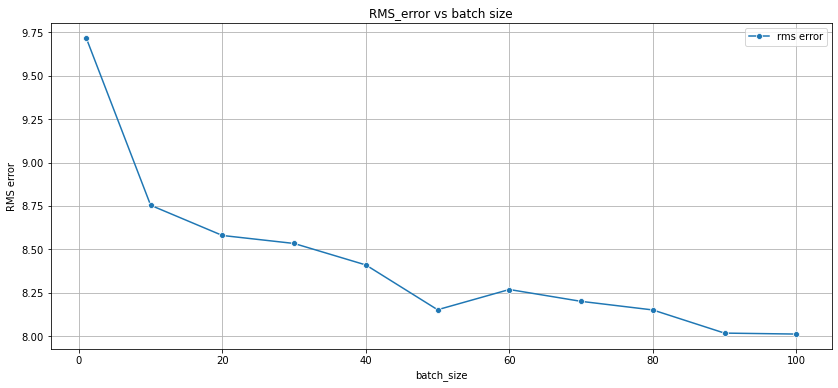

In [223]:
#adjusting batch size
batch_sizes=[1,10,20,30,40,50,60,70,80,90,100]
#batch_sizes=[i for i in range(1,21)]
err=[]
errmin=1e32
for bs in batch_sizes:
    a,lr,w=gd_batch(100,6,xdata,tdata,bs,2.1e-5)
    err.append(rms_error(a,100))
    #err.append(a)
    if a<errmin:
        errmin=a
        bmin=bs
#print('min error at batch size',bmin,'error', errmin)
print('min error at batch size',bmin,'error', rms_error(errmin,100))
plt.figure(figsize=(14,6))
sns.lineplot(batch_sizes,err,marker='o',label='rms error')
plt.title('RMS_error vs batch size')
plt.xlabel("batch_size")
plt.ylabel("RMS error")
plt.grid(True)
plt.show()

In [224]:
#calculating data limits
xmin=min(xdata)
xmax=max(xdata)
print(xmin,xmax)

-1.4 2.56


In [225]:
batch_size=100
a,lr,w=gd_batch(100,6,xdata,tdata,batch_size,2.1e-5,10000)
print(a)

3209.8992712172667


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


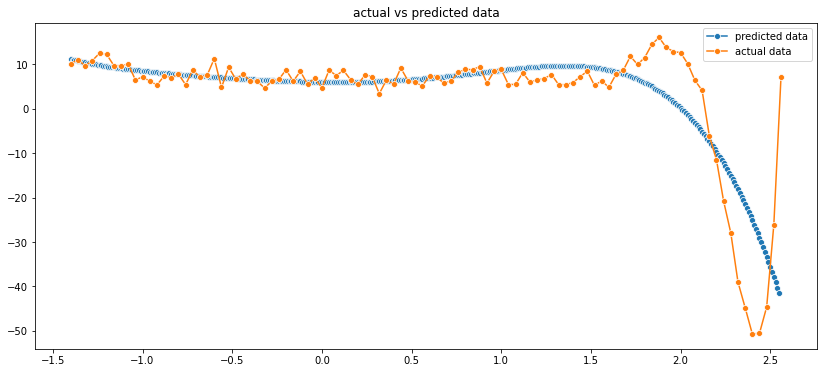

In [226]:
#polynomial function approximation
xp=[i/100 for i in range(-140,256)]
#xp=[i/100 for i in range(-104,248)]
yp=[]
for x_coord in xp:
    phi=make_phi(6,x_coord)
    yp.append(np.sum(np.matmul(w.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted data')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual vs predicted data')
plt.show()


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


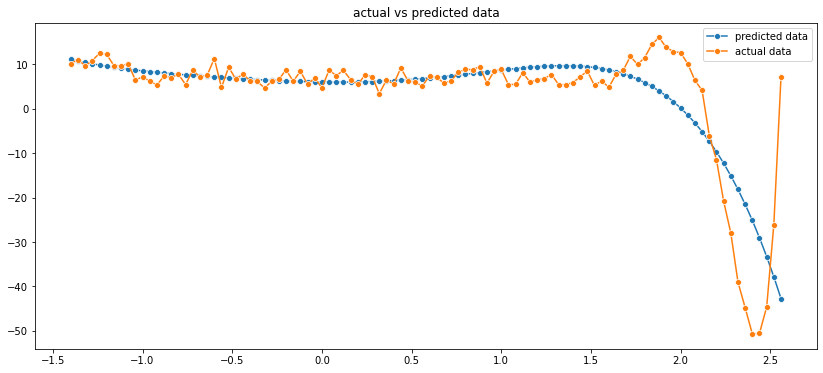

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


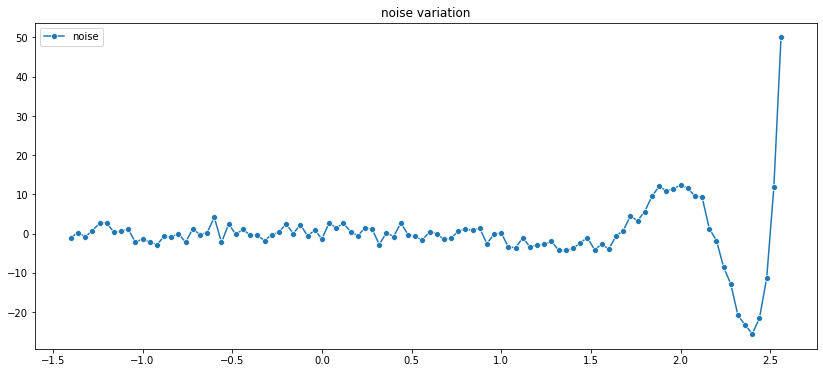

mean of noise -0.005489780815479266
variance of noise 64.19795528665193


In [227]:
#noise variance
pred=[]
for i in range(100):
    phi=make_phi(6,xdata[i])
    pred.append(np.sum(np.matmul(w.transpose(),phi)))
noise=(np.subtract(tdata,pred))
plt.figure(figsize=(14,6))
sns.lineplot(xdata,pred,marker='o',label='predicted data')
sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual vs predicted data')
plt.show()
plt.figure(figsize=(14,6))
sns.lineplot(xdata,noise,marker='o',label='noise')
plt.title('noise variation')
plt.show()
print('mean of noise',np.mean(noise))
print('variance of noise',np.var(noise))

In [228]:
#regularized
def gd_batch_reg(lamb,n,m,x_full,t_full,batch_size=-1,learning_rate=1,epochs=1000):
    w=np.zeros(m)
    err_bound_up=reg_sum_square_error(lamb,m,n,t_full,w,x_full)
    if(batch_size==-1):
        batch_size=n
    batch_size=int(batch_size)
    batch_count=int(np.ceil(n/batch_size))
    #batch_count=int((n/batch_size))
    epochs=int(epochs/batch_count)#modified epochs to control iterations
    for e in range(epochs):
        for b in range(batch_count):
            start_index=b*batch_size
            end_index=min(start_index+batch_size,n)
            x=x_full[start_index:end_index]
            t=t_full[start_index:end_index]
            
            w2=np.add(w,learning_rate*der_err(end_index-start_index,m,t,x,w,lamb))
            a=(reg_sum_square_error(lamb,m,n,t_full,w2,x_full))
            
            while(a>2*err_bound_up):
                learning_rate/=10
                #print('lr',learning_rate)
                w2=np.add(w,learning_rate*der_err(end_index-start_index,m,t,x,w,lamb))
                a=(reg_sum_square_error(lamb,m,n,t_full,w2,x_full))
                #print('err',a)
            
            w=w2
    return a,learning_rate,w
        
    
    

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


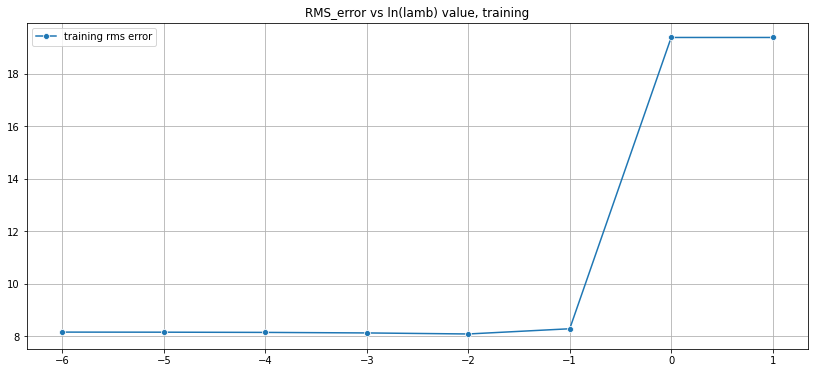

In [229]:
#error vs lambda
lambdas=[i for i in range(-6,2)]
training_rms=[]
for lambd in lambdas:
    a,lr,w=gd_batch_reg(np.exp(lambd),100,6,xdata,tdata,-1,2.1e-5)
    training_rms.append(rms_error(a,100))
plt.figure(figsize=(14,6))
sns.lineplot(lambdas,training_rms,marker='o',label='training rms error')
plt.title('RMS_error vs ln(lamb) value, training')
plt.grid(True)
plt.show()